![Crime banner](crime.jpeg "Crime Banner")

## Introduction

##### In this notebook, I'm going to explore a data set with information from various crimes committed between 2015 and 2018.

### Table of contents <br>
- Import necessary libraries
- Look for the appropriate encoding
- Uploading dataset
- Rows x Columns
- Drop duplicates
- Information about columns
- Number of null values per column
- Unique values per column
- Some questions to answer
    1. What are the most common crimes in terms of offense group?
    2. What are the least common crimes in terms of offense group?
    3. What are the most common offense descriptions?
    4. In which year were the most crimes commited?
    5. Are there more crimes committed on specific days?
    6. Are there more crimes during specific hours?
    7. On what days and during which hours are the most crimes committed?
    8. In wich months were the number of crimes below average? 
    9. In wich months on average did the most crimes occur?
    10. In which districts were the most crimes commmitted on yearly basis? 

### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from encodings.aliases import aliases

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Look for the appropriate encoding


In [2]:
alias_values = set(aliases.values())

for encoding in alias_values:
    try:
        df = pd.read_csv("crime.csv", nrows=10, encoding=encoding)
        print('succesfull ', encoding)
    except:
        pass

succesfull  cp869
succesfull  cp1140
succesfull  big5hkscs
succesfull  iso8859_8
succesfull  cp1255
succesfull  iso8859_15
succesfull  ptcp154
succesfull  cp932
succesfull  iso8859_6
succesfull  cp437
succesfull  iso8859_5
succesfull  iso8859_14
succesfull  cp273
succesfull  cp1257
succesfull  cp860
succesfull  cp1125
succesfull  cp1254
succesfull  cp1256
succesfull  iso8859_9
succesfull  mac_latin2
succesfull  utf_16_le
succesfull  cp862
succesfull  mac_turkish
succesfull  latin_1
succesfull  cp037
succesfull  cp1251
succesfull  cp865
succesfull  cp858
succesfull  iso8859_13
succesfull  iso8859_7
succesfull  mac_iceland
succesfull  cp866
succesfull  cp1250
succesfull  iso8859_11
succesfull  cp1026
succesfull  cp850
succesfull  kz1048
succesfull  mac_greek
succesfull  hp_roman8
succesfull  cp855
succesfull  utf_16_be
succesfull  iso8859_2
succesfull  cp863
succesfull  gbk
succesfull  cp857
succesfull  mac_cyrillic
succesfull  cp1258
succesfull  cp500
succesfull  iso8859_10
succesfull  

### Uploading dataset

In [3]:
crime = pd.read_csv("crime.csv", encoding="ISO-8859-14") #choose one from the list
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Rows x Columns

In [4]:
print('Rows x Columns:')
crime.shape

Rows x Columns:


(319073, 17)

In [5]:
print ("Duplicate values: " )
crime.duplicated().sum()

Duplicate values: 


23

### Drop duplicates

In [6]:
crime.drop_duplicates(inplace=True)
crime.shape

(319050, 17)

In [7]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


### Information about columns

In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [9]:
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,319050,318960,308179,319050
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,29,48489,158537,14192,19998


### Number of null values per column

In [10]:
np.sum(crime.isnull())

/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [11]:
print ('columns with at least one null value: \n', crime.columns[np.sum(crime.isnull()) != 0])

columns with at least one null value: 
 Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')


### Unique values per column

In [12]:
for col in crime.columns:
    unique_count = crime[col].nunique()
    print (col + ' has ' + str(unique_count) + ' unique values')

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


### Some questions to answer

#### 1. What are the most common crimes in terms of offense group?

In [13]:

crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

In [14]:
print("First 10 most common crimes: ")
top_10_offense_group = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
top_10_offense_group

First 10 most common crimes: 


OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Offense Groups (%)')

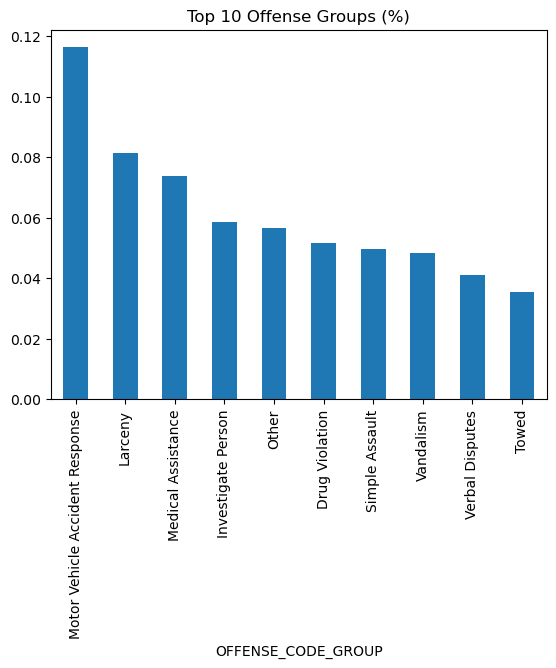

In [15]:
(top_10_offense_group/crime.shape[0]).plot(kind='bar')
plt.title('Top 10 Offense Groups (%)')

#### 2. What are the least common crimes in terms of offense group?

In [16]:
least_offense_group = crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]
least_offense_group

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

#### 3. What are the most common offense descriptions?

In [17]:
top_10_offense_desc = crime.OFFENSE_DESCRIPTION.value_counts()[:10]
top_10_offense_desc

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Offense Description (%)')

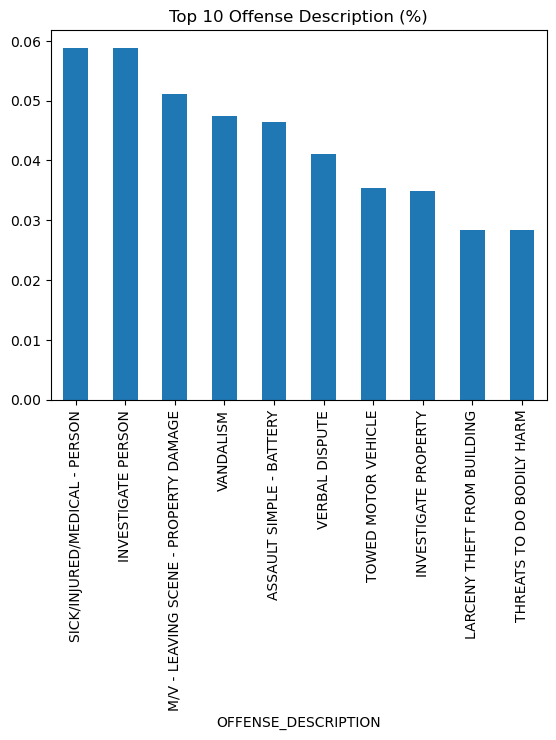

In [18]:
(top_10_offense_desc/crime.shape[0]).plot(kind='bar')
plt.title('Top 10 Offense Description (%)')

#### 4. In which year were the most crimes commited?

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of crimes by Year')

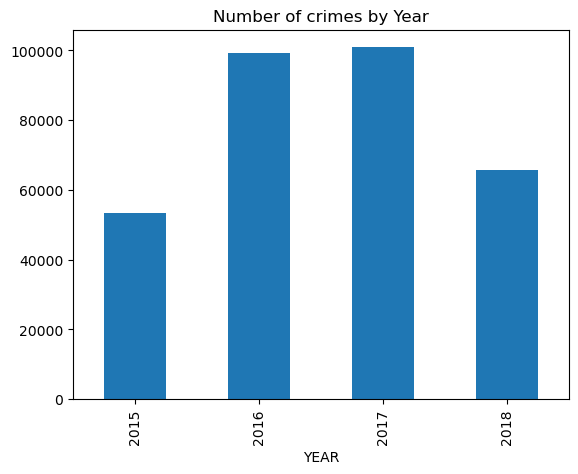

In [19]:
display(crime.groupby('YEAR').count()['INCIDENT_NUMBER'])
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.title('Number of crimes by Year')

#### 5. Are there more crimes committed on specific days?

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

<Axes: xlabel='DAY_OF_WEEK'>

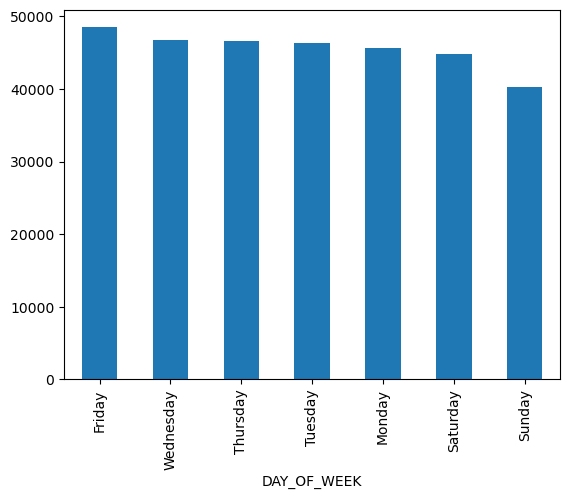

In [20]:
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False))
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar')

#### 6. Are there more crimes during specific hours?

HOUR
17    20762
18    20301
16    19870
12    18676
19    17587
14    17189
13    16845
15    16519
11    16445
10    16345
20    15849
0     15106
9     14740
21    14109
8     13042
22    12925
23    10596
1      9267
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of crimes by HOUR')

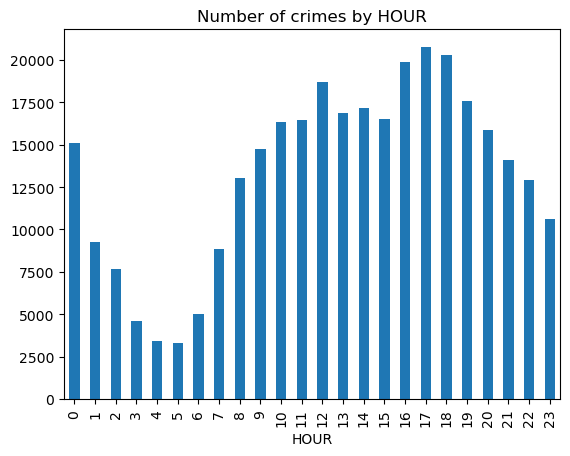

In [21]:
display(crime.groupby('HOUR').count()['INCIDENT_NUMBER'].sort_values(ascending=False))

crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.title('Number of crimes by HOUR')

#### 7. On what days and during which hours are the most crimes committed?

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


<Axes: ylabel='HOUR'>

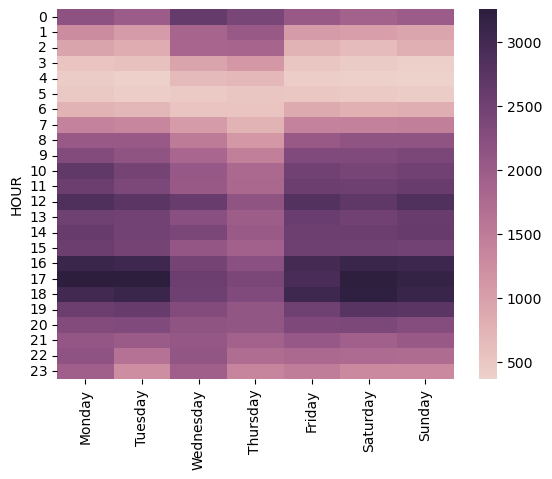

In [22]:
week_and_hour = crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
display(week_and_hour)
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True))

#### 8. In wich months were the number of crimes below average? 
#### 9. In wich months on average did the most crimes occur?

In [33]:
# If the value is less than the average crime per month, highlight the value in lightblue

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print('The average crime is: ', str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None

s2 = year_and_month.style.applymap(style_negative, props='color:lightblue;')\
.applymap(lambda v:'opacity:40%;' if(v < 0.3) and (v > -0.3) else None)
s2

# Highlight the maximun in a column in darkgreen
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

The average crime is:  7976.25


/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_56346/364403935.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s2 = year_and_month.style.applymap(style_negative, props='color:lightblue;')\
/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_56346/364403935.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v:'opacity:40%;' if(v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


#### 10. In which districts were the most crimes commmitted on yearly basis? 

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


<Axes: xlabel='YEAR', ylabel='DISTRICT'>

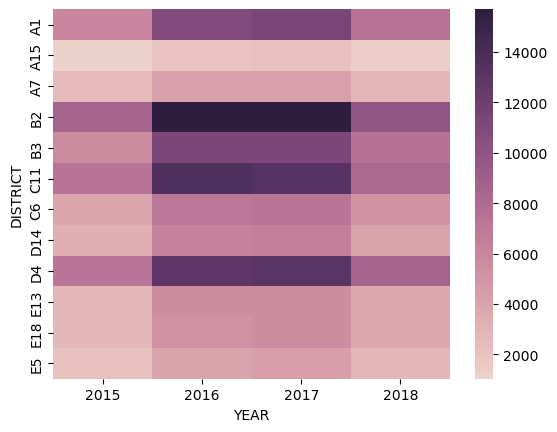

In [32]:
year_and_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
#week_and_hour.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
display(year_and_district)
sns.heatmap(year_and_district, cmap=sns.cubehelix_palette(as_cmap=True))